In [188]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Subset
import numpy as np




In [189]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [193]:
train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [201]:
train_size = 2500
train_subset, _ = torch.utils.data.random_split(train_set, [train_size, len(train_set) - train_size])


In [202]:
import torch
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms

In [203]:
train_loader = DataLoader(train_subset, batch_size=250, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=500, shuffle=False)


In [204]:
print("Training Dataset Size:", len(train_subset))
print("Validation Dataset Size:", len(val_subset))
print("Number of training batches:", len(train_loader))
print("Number of validation batches:", len(val_loader))

Training Dataset Size: 2500
Validation Dataset Size: 320
Number of training batches: 10
Number of validation batches: 1


In [205]:
data_iter = iter(train_loader)
images, labels = next(data_iter)
print("Training Dataset Size:", images.shape)
print("Testing Dataset Size:", next(iter(test_loader))[0].shape)

Training Dataset Size: torch.Size([250, 3, 32, 32])
Testing Dataset Size: torch.Size([500, 3, 32, 32])


In [206]:
print("Number of training batches:", len(train_loader))
print("Number of validation batches:", len(val_loader))

Number of training batches: 10
Number of validation batches: 1


In [207]:
import matplotlib.pyplot as plt
classes = train_set.classes

In [208]:
random_indices = np.random.choice(images.size(0), 5, replace=False)
random_images = images[random_indices]
random_labels = labels[random_indices]


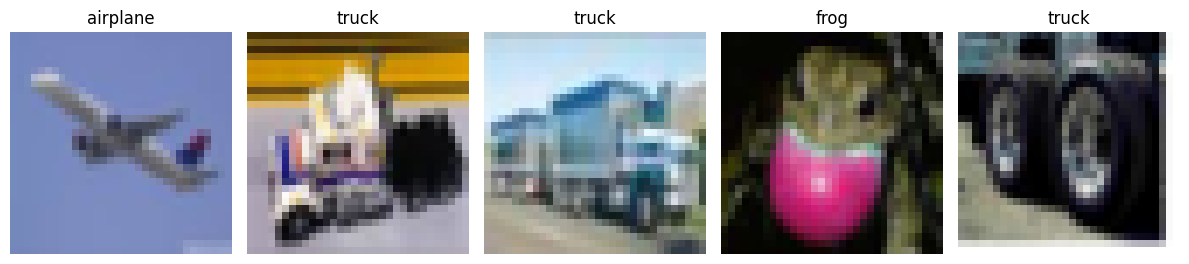

In [209]:
fig, axs = plt.subplots(1, 5, figsize=(12, 3))
for i, ax in enumerate(axs):
    img = random_images[i].permute(1, 2, 0)  
    img = (img * 0.5) + 0.5
    ax.imshow(img.numpy())
    ax.set_title(classes[random_labels[i].item()])
    ax.axis('off')

plt.tight_layout()
plt.show()

In [210]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [211]:

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)


sample_image, label = train_dataset[0]
print(f"Sample Image Tensor (normalized): {sample_image}")
print(f"Label: {label}")


Files already downloaded and verified
Files already downloaded and verified
Sample Image Tensor (normalized): tensor([[[-0.5373, -0.6627, -0.6078,  ...,  0.2392,  0.1922,  0.1608],
         [-0.8745, -1.0000, -0.8588,  ..., -0.0353, -0.0667, -0.0431],
         [-0.8039, -0.8745, -0.6157,  ..., -0.0745, -0.0588, -0.1451],
         ...,
         [ 0.6314,  0.5765,  0.5529,  ...,  0.2549, -0.5608, -0.5843],
         [ 0.4118,  0.3569,  0.4588,  ...,  0.4431, -0.2392, -0.3490],
         [ 0.3882,  0.3176,  0.4039,  ...,  0.6941,  0.1843, -0.0353]],

        [[-0.5137, -0.6392, -0.6235,  ...,  0.0353, -0.0196, -0.0275],
         [-0.8431, -1.0000, -0.9373,  ..., -0.3098, -0.3490, -0.3176],
         [-0.8118, -0.9451, -0.7882,  ..., -0.3412, -0.3412, -0.4275],
         ...,
         [ 0.3333,  0.2000,  0.2627,  ...,  0.0431, -0.7569, -0.7333],
         [ 0.0902, -0.0353,  0.1294,  ...,  0.1608, -0.5137, -0.5843],
         [ 0.1294,  0.0118,  0.1137,  ...,  0.4431, -0.0745, -0.2784]],

      

In [212]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchsummary import summary



In [213]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1, padding=2)
        self.pool = nn.AvgPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0)
        
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1, padding=0)

        self.fc1 = nn.Linear(480, 84)  # Input size matches the flattened size after conv3

        self.fc2 = nn.Linear(84, 10)
        
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        
        x = F.relu(self.conv2(x))
        x = self.pool(x)

        x = F.relu(self.conv3(x))
        
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        
        x = self.fc2(x)         
        
        return x
    
model = LeNet5()

print(model)


LeNet5(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=480, out_features=84, bias=True)
  (fc2): Linear(in_features=84, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


In [214]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

model = LeNet5().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10

for epoch in range(1, num_epochs + 1):
    model.train()
    running_train_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_loss = running_train_loss / len(train_loader)
    train_accuracy = correct_train / total_train

    model.eval()
    running_val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_loss = running_val_loss / len(val_loader)
    val_accuracy = correct_val / total_val

    print(f'Epoch [{epoch}/{num_epochs}], '
          f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, '
          f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')


Epoch [1/10], Train Loss: 2.2848, Train Accuracy: 0.1372, Validation Loss: 2.2381, Validation Accuracy: 0.2156
Epoch [2/10], Train Loss: 2.1929, Train Accuracy: 0.1988, Validation Loss: 2.1029, Validation Accuracy: 0.2250
Epoch [3/10], Train Loss: 2.1285, Train Accuracy: 0.2380, Validation Loss: 2.0723, Validation Accuracy: 0.2750
Epoch [4/10], Train Loss: 2.0744, Train Accuracy: 0.2596, Validation Loss: 1.9728, Validation Accuracy: 0.3125
Epoch [5/10], Train Loss: 1.9812, Train Accuracy: 0.3028, Validation Loss: 1.8943, Validation Accuracy: 0.3219
Epoch [6/10], Train Loss: 1.9086, Train Accuracy: 0.3224, Validation Loss: 1.8623, Validation Accuracy: 0.3031
Epoch [7/10], Train Loss: 1.8656, Train Accuracy: 0.3232, Validation Loss: 1.8120, Validation Accuracy: 0.3531
Epoch [8/10], Train Loss: 1.8394, Train Accuracy: 0.3388, Validation Loss: 1.7846, Validation Accuracy: 0.3375
Epoch [9/10], Train Loss: 1.7696, Train Accuracy: 0.3632, Validation Loss: 1.7394, Validation Accuracy: 0.3781
E

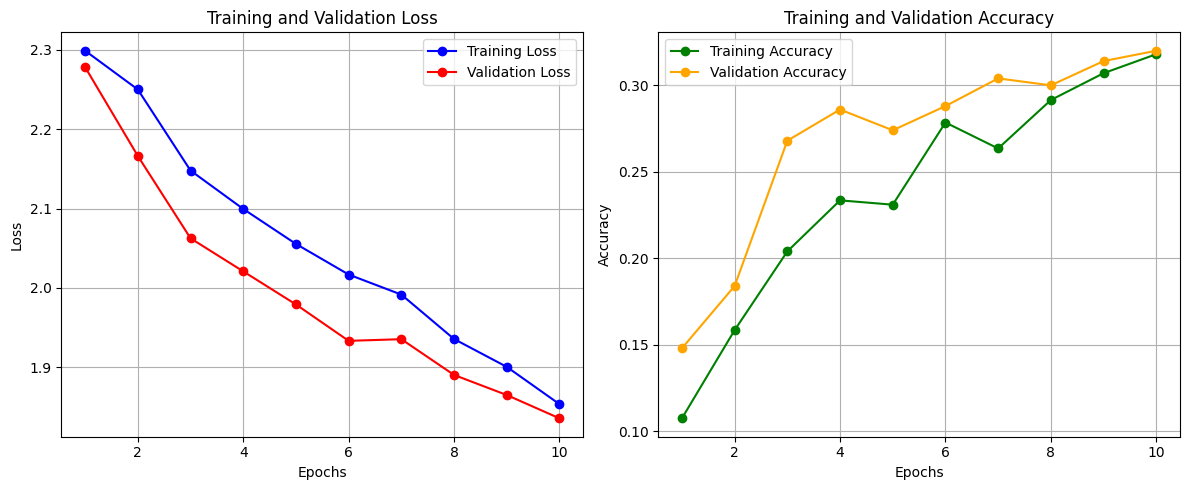

In [215]:
import matplotlib.pyplot as plt

epochs = list(range(1, 11))
train_losses = [2.2990, 2.2501, 2.1479, 2.0995, 2.0554, 2.0168, 1.9915, 1.9355, 1.9004, 1.8534]
train_accuracies = [0.1075, 0.1585, 0.2040, 0.2335, 0.2310, 0.2785, 0.2635, 0.2915, 0.3070, 0.3180]
validation_losses = [2.2783, 2.1663, 2.0625, 2.0208, 1.9791, 1.9332, 1.9353, 1.8902, 1.8649, 1.8355]
validation_accuracies = [0.1480, 0.1840, 0.2680, 0.2860, 0.2740, 0.2880, 0.3040, 0.3000, 0.3140, 0.3200]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss', color='blue', marker='o')
plt.plot(epochs, validation_losses, label='Validation Loss', color='red', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Training Accuracy', color='green', marker='o')
plt.plot(epochs, validation_accuracies, label='Validation Accuracy', color='orange', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [216]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

def l1_regularization(model, l1_lambda):
    l1_norm = sum(p.abs().sum() for p in model.parameters() if p.requires_grad)
    return l1_lambda * l1_norm

def l2_regularization(model, l2_lambda):
    l2_norm = sum(p.pow(2).sum() for p in model.parameters() if p.requires_grad)
    return l2_lambda * l2_norm

model = LeNet5().to(device)
criterion = nn.CrossEntropyLoss()

l2_lambda = 0.0001
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=l2_lambda)

num_epochs = 10
l1_lambda = 0.0001

for epoch in range(1, num_epochs + 1):
    model.train()
    running_train_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)

        loss += l1_regularization(model, l1_lambda)  

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_loss = running_train_loss / len(train_loader)
    train_accuracy = correct_train / total_train

    model.eval()
    running_val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_loss = running_val_loss / len(val_loader)
    val_accuracy = correct_val / total_val

    print(f'Epoch [{epoch}/{num_epochs}], '
          f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, '
          f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')


Epoch [1/10], Train Loss: 2.4986, Train Accuracy: 0.1024, Validation Loss: 2.2924, Validation Accuracy: 0.1469
Epoch [2/10], Train Loss: 2.3970, Train Accuracy: 0.1772, Validation Loss: 2.1871, Validation Accuracy: 0.2156
Epoch [3/10], Train Loss: 2.2691, Train Accuracy: 0.2028, Validation Loss: 2.0693, Validation Accuracy: 0.2687
Epoch [4/10], Train Loss: 2.1980, Train Accuracy: 0.2216, Validation Loss: 2.0119, Validation Accuracy: 0.2938
Epoch [5/10], Train Loss: 2.1610, Train Accuracy: 0.2444, Validation Loss: 1.9707, Validation Accuracy: 0.3187
Epoch [6/10], Train Loss: 2.1182, Train Accuracy: 0.2516, Validation Loss: 1.9250, Validation Accuracy: 0.3187
Epoch [7/10], Train Loss: 2.0930, Train Accuracy: 0.2624, Validation Loss: 1.9402, Validation Accuracy: 0.3156
Epoch [8/10], Train Loss: 2.0517, Train Accuracy: 0.2752, Validation Loss: 1.8758, Validation Accuracy: 0.3344
Epoch [9/10], Train Loss: 2.0069, Train Accuracy: 0.2952, Validation Loss: 1.8153, Validation Accuracy: 0.3531
E

In [217]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.init as init

class LeNet5(nn.Module):
    def __init__(self, activation_function='ReLU'):
        super(LeNet5, self).__init__()
        
        self.activation_function = activation_function
        
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1, padding=2)
        self.bn1 = nn.BatchNorm2d(6)
        self.pool = nn.AvgPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.bn2 = nn.BatchNorm2d(16)
        
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1, padding=0)
        self.bn3 = nn.BatchNorm2d(120)

        self.fc1 = nn.Linear(480, 84)
        self.fc2 = nn.Linear(84, 10)
        
        

        self._initialize_weights()

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                init.kaiming_normal_(m.weight, mode='fan_in', nonlinearity='relu')
                init.constant_(m.bias, 0)

    def forward(self, x):
        x = self.apply_activation(self.bn1(self.conv1(x)))
        x = self.pool(x)
        
        x = self.apply_activation(self.bn2(self.conv2(x)))
        x = self.pool(x)

        x = self.apply_activation(self.bn3(self.conv3(x)))
        
        x = torch.flatten(x, 1)
        x = self.apply_activation(self.fc1(x))
        
        
        x = self.fc2(x)
        return x

    def apply_activation(self, x):
        if self.activation_function == 'ReLU':
            return F.relu(x)
        elif self.activation_function == 'Tanh':
            return torch.tanh(x)
        elif self.activation_function == 'LeakyReLU':
            return F.leaky_relu(x, negative_slope=0.01)
        elif self.activation_function == 'Softmax':
            return F.softmax(x, dim=1)
        else:
            raise ValueError("Invalid activation function specified")

activation_functions = ['ReLU', 'Tanh', 'LeakyReLU', 'Softmax']

for activation in activation_functions:
    print(f"Training with {activation} activation function")
    model = LeNet5(activation_function=activation).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    
    num_epochs = 10
    for epoch in range(1, num_epochs + 1):
        model.train()
        running_train_loss = 0.0
        correct_train = 0
        total_train = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_train_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_loss = running_train_loss / len(train_loader)
        train_accuracy = correct_train / total_train

        model.eval()
        running_val_loss = 0.0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                running_val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

        val_loss = running_val_loss / len(val_loader)
        val_accuracy = correct_val / total_val

        print(f'Epoch [{epoch}/{num_epochs}], '
              f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, '
              f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')
    
 


Training with ReLU activation function
Epoch [1/10], Train Loss: 2.1722, Train Accuracy: 0.2272, Validation Loss: 2.1329, Validation Accuracy: 0.3125
Epoch [2/10], Train Loss: 1.6548, Train Accuracy: 0.4212, Validation Loss: 1.8784, Validation Accuracy: 0.3719
Epoch [3/10], Train Loss: 1.4176, Train Accuracy: 0.5196, Validation Loss: 1.7198, Validation Accuracy: 0.3969
Epoch [4/10], Train Loss: 1.2295, Train Accuracy: 0.5852, Validation Loss: 1.6078, Validation Accuracy: 0.4125
Epoch [5/10], Train Loss: 1.0705, Train Accuracy: 0.6336, Validation Loss: 1.5804, Validation Accuracy: 0.4531
Epoch [6/10], Train Loss: 0.9326, Train Accuracy: 0.7072, Validation Loss: 1.6089, Validation Accuracy: 0.4469
Epoch [7/10], Train Loss: 0.7861, Train Accuracy: 0.7752, Validation Loss: 1.5962, Validation Accuracy: 0.4562
Epoch [8/10], Train Loss: 0.6725, Train Accuracy: 0.8160, Validation Loss: 1.5736, Validation Accuracy: 0.4719
Epoch [9/10], Train Loss: 0.5701, Train Accuracy: 0.8588, Validation Loss

In [218]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class MinPool2d(nn.Module):
    def __init__(self, kernel_size, stride, padding=0):
        super(MinPool2d, self).__init__()
        self.kernel_size = kernel_size
        self.stride = stride
        self.padding = padding

    def forward(self, x):
        min_pool = F.avg_pool2d(-x, self.kernel_size, self.stride, self.padding)
        return -min_pool

class LeNet5(nn.Module):
    def __init__(self, pooling_type='avg'):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5, 1, 2)
        self.pooling_type = pooling_type

        if pooling_type == 'avg':
            self.pool = nn.AvgPool2d(2, 2)
        elif pooling_type == 'max':
            self.pool = nn.MaxPool2d(2, 2)
        elif pooling_type == 'min':
            self.pool = MinPool2d(2, 2)
        else:
            raise ValueError("Unsupported pooling type. Use 'avg', 'max', or 'min'.")
        
        self.conv2 = nn.Conv2d(6, 16, 5, 1, 0)
        self.conv3 = nn.Conv2d(16, 120, 5, 1, 0)
        self.fc1 = nn.Linear(480, 84)
        self.fc2 = nn.Linear(84, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

model_avg = LeNet5(pooling_type='avg')
model_max = LeNet5(pooling_type='max')
model_min = LeNet5(pooling_type='min')

print("Model with Average Pooling:")
print(model_avg)
print("\nModel with Max Pooling:")
print(model_max)
print("\nModel with Min Pooling:")
print(model_min)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_avg.parameters(), lr=0.001)

from torchvision import transforms

transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


Model with Average Pooling:
LeNet5(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=480, out_features=84, bias=True)
  (fc2): Linear(in_features=84, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

Model with Max Pooling:
LeNet5(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=480, out_features=84, bias=True)
  (fc2): Linear(in_features=84, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

Model with Min Pooling:
LeNet5(
  (conv1): Conv2d(3, 6, kernel_

In [220]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

def train_and_evaluate_model(model, epochs=5, batch_size=32):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    x_train = torch.randn(1000, 3, 32, 32)
    y_train = torch.randint(0, 10, (1000,))
    x_val = torch.randn(200, 3, 32, 32)
    y_val = torch.randint(0, 10, (200,))

    train_loader = DataLoader(TensorDataset(x_train, y_train), batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(TensorDataset(x_val, y_val), batch_size=batch_size, shuffle=False)
    epochs=10
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_accuracy = 100 * correct_train / total_train
       
        model.eval()
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                _, predicted = torch.max(outputs, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

        val_accuracy = 100 * correct_val / total_val
        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}, Training Accuracy: {train_accuracy:.2f}% Validation Accuracy: {val_accuracy:.2f}%")

    return train_accuracy, val_accuracy

print("\nTraining Model with Max Pooling")
train_accuracy_max, val_accuracy_max = train_and_evaluate_model(model_max)

print("\nTraining Model with Min Pooling")
train_accuracy_min, val_accuracy_min = train_and_evaluate_model(model_min)


Training Model with Max Pooling
Epoch 1/10, Loss: 2.3340, Training Accuracy: 10.80% Validation Accuracy: 8.50%
Epoch 2/10, Loss: 2.2980, Training Accuracy: 12.40% Validation Accuracy: 9.50%
Epoch 3/10, Loss: 2.2865, Training Accuracy: 12.50% Validation Accuracy: 9.00%
Epoch 4/10, Loss: 2.2495, Training Accuracy: 15.80% Validation Accuracy: 11.50%
Epoch 5/10, Loss: 2.2067, Training Accuracy: 19.20% Validation Accuracy: 11.00%
Epoch 6/10, Loss: 2.1247, Training Accuracy: 22.20% Validation Accuracy: 8.50%
Epoch 7/10, Loss: 2.0409, Training Accuracy: 26.90% Validation Accuracy: 11.50%
Epoch 8/10, Loss: 1.9427, Training Accuracy: 27.70% Validation Accuracy: 6.50%
Epoch 9/10, Loss: 1.8591, Training Accuracy: 30.70% Validation Accuracy: 10.00%
Epoch 10/10, Loss: 1.7013, Training Accuracy: 39.50% Validation Accuracy: 8.00%

Training Model with Min Pooling
Epoch 1/10, Loss: 2.3036, Training Accuracy: 12.20% Validation Accuracy: 9.00%
Epoch 2/10, Loss: 2.3008, Training Accuracy: 11.30% Validati

In [221]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

transform_train = transforms.Compose([
    transforms.RandomRotation(15),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=100, shuffle=False)

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 64, 512)
        self.fc2 = nn.Linear(512, 10)
        self.pool = nn.MaxPool2d(2, 2)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 8 * 8 * 64)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleCNN()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}')
    print("Training finished.")

train_model(model, train_loader, criterion, optimizer, num_epochs=10)

def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f'Accuracy of the model on the test images: {accuracy:.2f}%')

evaluate_model(model, test_loader)

transform_train_no_aug = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_set_no_aug = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train_no_aug)
train_loader_no_aug = DataLoader(train_set_no_aug, batch_size=64, shuffle=True)

model_no_aug = SimpleCNN()
train_model(model_no_aug, train_loader_no_aug, criterion, optimizer, num_epochs=10)
evaluate_model(model_no_aug, test_loader)


Files already downloaded and verified
Files already downloaded and verified
Epoch 1/10, Loss: 1.5390
Epoch 2/10, Loss: 1.2275
Epoch 3/10, Loss: 1.0984
Epoch 4/10, Loss: 1.0134
Epoch 5/10, Loss: 0.9511
Epoch 6/10, Loss: 0.9103
Epoch 7/10, Loss: 0.8649
Epoch 8/10, Loss: 0.8329
Epoch 9/10, Loss: 0.8140
Epoch 10/10, Loss: 0.7877
Training finished.
Accuracy of the model on the test images: 75.89%
Files already downloaded and verified
Epoch 1/10, Loss: 2.3046
Epoch 2/10, Loss: 2.3046
Epoch 3/10, Loss: 2.3046
Epoch 4/10, Loss: 2.3046
Epoch 5/10, Loss: 2.3046
Epoch 6/10, Loss: 2.3046
Epoch 7/10, Loss: 2.3046
Epoch 8/10, Loss: 2.3046
Epoch 9/10, Loss: 2.3046
Epoch 10/10, Loss: 2.3046
Training finished.
Accuracy of the model on the test images: 11.76%
